# **Check Worthiness model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/trabajo-final-check-worthiness/check-worthiness-project
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1S2YTpyjEJLco8XPXsyW3F4GAELxQkz49/trabajo-final-check-worthiness/check-worthiness-project
data/  git_commands.ipynb  main.ipynb


# Dataset loading
`Using datasets in spanish language only`

>### clef2021-checkthat
>[dev & train](https://github.com/Newtral-Tech/clef2021-checkthat/tree/main)
>[testing](https://gitlab.com/checkthat_lab/clef2021-checkthat-lab/-/blob/master/task1/test-gold/subtask-1a--spanish.zip)  
>`topic_id | tweet_id | tweet_url | tweet_text | claim | check-worthiness`
>- data/clef2021-checkthat/dataset_train.csv.zip
>- data/clef2021-checkthat/dataset_dev.csv.zip
>- data/clef2021-checkthat/dataset_test_goldstandard.csv.zip



>### clef2022-checkthat-lab
>[dev dev_test train](https://gitlab.com/checkthat_lab/clef2022-checkthat-lab/clef2022-checkthat-lab/-/tree/main/task1/data/subtasks-spanish)  
>`topic | tweet_id | tweet_url | tweet_text | class_label`
>- data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_train.csv.zip
>- data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_dev.csv.zip
>- data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_dev_test.csv.zip

>### clef2023-checkthat-lab
>[dev dev_test train](https://gitlab.com/checkthat_lab/clef2023-checkthat-lab/-/tree/main/task1/data)  
>`tweet_id | tweet_url | tweet_text | class_label`
>- data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_train.csv.zip
>- data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_dev.csv.zip
>- data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_dev_test.csv.zip

In [ ]:
import pandas as pd

In [ ]:
# Training dataset

train_df = pd.read_csv('data/clef2021-checkthat/dataset_train.csv.zip')
train_df = train_df.drop('topic_id', axis=1)
train_df = train_df[train_df['claim'] == 1].drop('claim', axis=1) # 2495 a 952
train_df = train_df.rename(columns={'check-worthiness': 'class_label'})

aux_df = pd.read_csv('data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_train.csv.zip')
aux_df = aux_df.drop('topic', axis=1)
train_df = pd.concat([train_df, aux_df])

aux_df = pd.read_csv('data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_train.csv.zip')
aux_df['class_label'] = aux_df['class_label'].replace('No', 0).replace('Yes', 1)
train_df = pd.concat([train_df, aux_df], ignore_index=True)  # every dataframe concatenated

train_df

,tweet_id,tweet_url,tweet_text,class_label
0,1217566329823252481,https://twitter.com/user/status/12175663298232...,@tve_tve vuelve a quedar en evidencia. Desplaz...,0
1,1172059020095610881,https://twitter.com/user/status/11720590200956...,El nuevo curso escolar en #Andalucía comienza ...,0
2,1226480356955693056,https://twitter.com/user/status/12264803569556...,El PP se equivoca total y completamente excluy...,0
3,1259920819834191872,https://twitter.com/user/status/12599208198341...,Si algo define a @CruzRojaEsp es que siempre e...,0
4,1226086367710580737,https://twitter.com/user/status/12260863677105...,"Hoy @populares se ha unido a PSOE, PODEMOS y ...",0
...,...,...,...,...
13425,1447650732581310470,https://twitter.com/user/status/14476507325813...,"Las organizaciones médicas alertan de una ""inm...",0
13426,1456501355833696256,https://twitter.com/user/status/14565013558336...,82 días desde que empezó el #IFNavalacruz en #...,0
13427,1440963865848819714,https://twitter.com/user/status/14409638658488...,🌍 Valiente y coherente‼️ El presidente Pedro S...,0
13428,1446462258121428993,https://twitter.com/user/status/14464622581214...,El PP no conforme con retrasar la llegada del ...,0


In [ ]:
# Dev dataset

dev_df = pd.read_csv('data/clef2021-checkthat/dataset_dev.csv.zip')
dev_df = dev_df.drop('topic_id', axis=1)
dev_df = dev_df[dev_df['claim'] == 1].drop('claim', axis=1)
dev_df = dev_df.rename(columns={'check-worthiness': 'class_label'})

aux_df = pd.read_csv('data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_dev.csv.zip')
aux_df = aux_df.drop('topic', axis=1)
dev_df = pd.concat([dev_df, aux_df])

aux_df = pd.read_csv('data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_dev.csv.zip')
aux_df['class_label'] = aux_df['class_label'].replace('No', 0).replace('Yes', 1)
dev_df = pd.concat([dev_df, aux_df], ignore_index=True)  # every dataframe concatenated

dev_df

,tweet_id,tweet_url,tweet_text,class_label
0,1227543257690918913,https://twitter.com/user/status/12275432576909...,4. La conclusión para no iniciados es clara: l...,1
1,1222917768774856707,https://twitter.com/user/status/12229177687748...,SUMA Y SIGUE\n\nTambién se ha detectado que Co...,1
2,1176096346379575296,https://twitter.com/user/status/11760963463795...,@CiudadanosCs #ThomasCook tiene en #España cer...,0
3,1224776781753978882,https://twitter.com/user/status/12247767817539...,"📢 Es insuficiente la subida del 0,9% de pensio...",0
4,1220305130324742145,https://twitter.com/user/status/12203051303247...,Que Sánchez DEPENDE del independentismo no es ...,0
...,...,...,...,...
5430,1456998178008481800,https://twitter.com/user/status/14569981780084...,Los 10 mejores cantantes de la historia del ro...,0
5431,1444601817590124544,https://twitter.com/user/status/14446018175901...,La izquierda y la 'pobreza energética' . http...,0
5432,1449465039027687427,https://twitter.com/user/status/14494650390276...,Un orgullo formar parte de la mesa del 40 cong...,0
5433,1443118096617775105,https://twitter.com/user/status/14431180966177...,Lamenta la CUP que la Mesa del Congreso ha cor...,0


In [ ]:
# Test dataset

test_df = pd.read_csv('data/clef2021-checkthat/dataset_test_goldstandard.csv.zip')
test_df = test_df.drop('topic_id', axis=1)
test_df = test_df[test_df['claim'] == 1].drop('claim', axis=1)
test_df = test_df.rename(columns={'check-worthiness': 'class_label'})

aux_df = pd.read_csv('data/clef2022-checkthat-lab/CT22_spanish_1A_checkworthy_dev_test.csv.zip')
aux_df = aux_df.drop('topic', axis=1)
test_df = pd.concat([test_df, aux_df])

aux_df = pd.read_csv('data/clef2023-checkthat-lab/CT23_1B_checkworthy_spanish_dev_test.csv.zip')
aux_df['class_label'] = aux_df['class_label'].replace('No', 0).replace('Yes', 1)
test_df = pd.concat([test_df, aux_df], ignore_index=True)  # every dataframe concatenated

test_df

,tweet_id,tweet_url,tweet_text,class_label
0,1296128564090351616,https://twitter.com/user/status/12961285640903...,"Qué tal si ponemos el foco aquí? ¿""Por no ser ...",1
1,1260816850658775042,https://twitter.com/user/status/12608168506587...,El 75% de los créditos ICO para pymes y autóno...,1
2,1268857203366256641,https://twitter.com/user/status/12688572033662...,"Visito Torrejón de Ardoz con su alcalde, donde...",1
3,1188175222026973184,https://twitter.com/user/status/11881752220269...,"Aquí tienen a TV3, una tv que pagamos todos, c...",0
4,1219242938389102592,https://twitter.com/user/status/12192429383891...,La tragedia vuelve a sacudirnos con un crimen ...,0
...,...,...,...,...
7971,1454818788126380037,https://twitter.com/user/status/14548187881263...,"Para ser grande, se entero: nada tuyo exageres...",0
7972,1464547666487132170,https://twitter.com/user/status/14645476664871...,Las políticas de @PSOE son las de la mayoría s...,0
7973,1458749622592155648,https://twitter.com/user/status/14587496225921...,Un gobierno incompetente y que engaña a los es...,1
7974,1455926135494217729,https://twitter.com/user/status/14559261354942...,Algunas de nuestras enmiendas a los #PGE2022: ...,0


In [ ]:
# Export to csv
train_df.to_csv('data/train.csv', index=False)
dev_df.to_csv('data/dev.csv', index=False)
test_df.to_csv('data/test.csv', index=False)
del aux_df
del train_df
del dev_df
del test_df

# Baselines

## Generic baseline

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
def generate_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=labels
    )
    disp.plot(cmap='Blues')
    plt.show()

In [ ]:
def run_baseline(pipeline, data_fpath, test_fpath, results_fpath, model_name):
    '''Works for every pipeline (or classifier) received by parameter.'''
    train_df = pd.read_csv(data_fpath)
    test_df = pd.read_csv(test_fpath)

    pipeline.fit(train_df['tweet_text'], train_df['class_label'])

    with open(results_fpath, "w") as results_file:
        predicted = pipeline.predict(test_df['tweet_text'])
        results_file.write("tweet_id\tclass_label\trun_id\n")

        for i, line in test_df.iterrows():
            label = predicted[i]
            results_file.write("{}\t{}\t{}\n".format(line["tweet_id"], label, model_name))
    
    generate_confusion_matrix(test_df['class_label'], predicted, pipeline.classes_)

## Random

In [ ]:
from sklearn.dummy import DummyClassifier

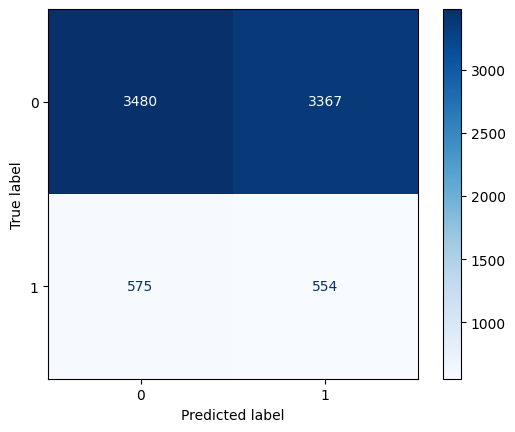

In [ ]:
run_baseline(
    pipeline=DummyClassifier(strategy="uniform", random_state=44),
    data_fpath='data/test.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_random.csv',
    model_name='random'
)

## Majority

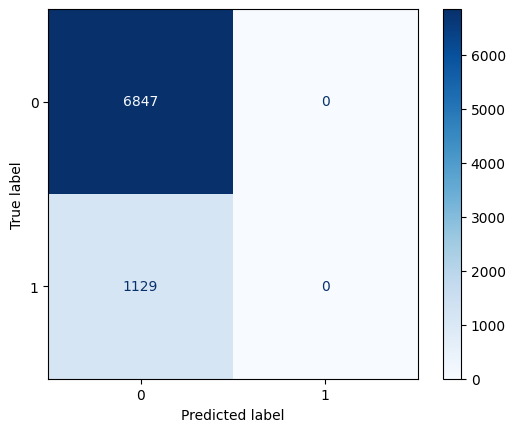

In [ ]:
run_baseline(
    pipeline=DummyClassifier(strategy="most_frequent"),
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_majority.csv',
    model_name='majority'
)

## SVC

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

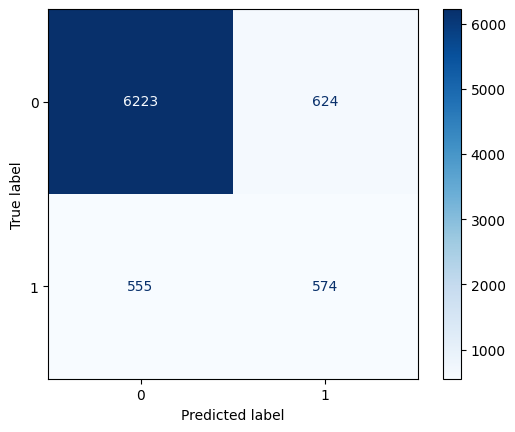

In [ ]:
pipeline = Pipeline([
    ('ngrams', TfidfVectorizer(ngram_range=(1, 1),lowercase=True,use_idf=True,max_df=0.95, min_df=3,max_features=5000)),  # (1, 1) means only unigrams 
    ('clf', SVC(C=1, gamma='scale', kernel='linear', random_state=0))
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_ngram.csv',
    model_name='ngram'
)

## Ejemplo Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = [
    'Este es el primer documento.',
    'Este documento es el segundo documento.',
    'Y este es el tercero.',
    'Es este el primer documento?',
    'El primer documento es asi loco',
    'Este documento es el ultimo, es para ser leido por los verdaderos inteligentes de la clase'
]

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))

In [ ]:
X = vectorizer.fit_transform(corpus)  # matrix of (n_samples, n_features)

In [ ]:
X

<6x20 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape  # 6 sentences, 20 features

(6, 20)

In [ ]:
vectorizer.get_feature_names_out()

array(['asi', 'clase', 'de', 'documento', 'el', 'es', 'este',
       'inteligentes', 'la', 'leido', 'loco', 'los', 'para', 'por',
       'primer', 'segundo', 'ser', 'tercero', 'ultimo', 'verdaderos'],
      dtype=object)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

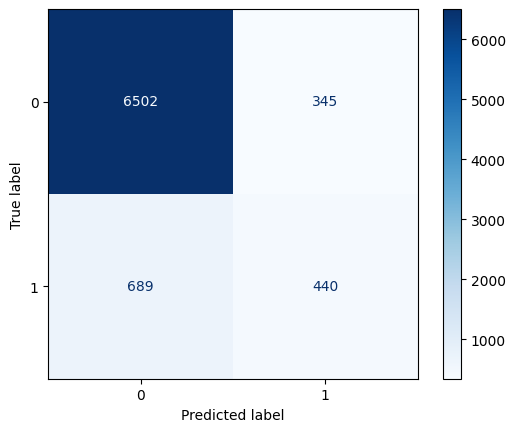

In [ ]:
pipeline = Pipeline([
    ('ngrams', TfidfVectorizer(ngram_range=(1, 1),lowercase=True,use_idf=True,max_df=0.95, min_df=3,max_features=5000)),  # (1, 1) means only unigrams 
    ('clf', MultinomialNB())
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_bayes.csv',
    model_name='bayes'
)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

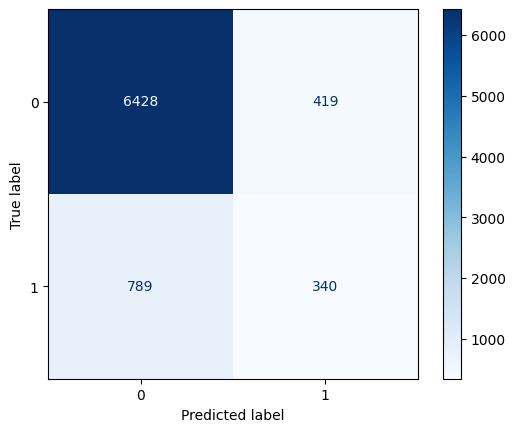

In [ ]:
pipeline = Pipeline([
    ('ngrams', TfidfVectorizer(ngram_range=(1, 1),lowercase=True,use_idf=True,max_df=0.95, min_df=3,max_features=5000)),  # (1, 1) means only unigrams 
    ('clf', RandomForestClassifier())
])
run_baseline(
    pipeline=pipeline,
    data_fpath='data/train.csv',
    test_fpath='data/test.csv',
    results_fpath='data/results_random_forest.csv',
    model_name='random_forest'
)

## Logistic Regression